In [1]:
from google.colab import drive
drive.mount('/content/gdrive' )

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/Comp4900A3'
!ls './data/'

/content/gdrive/My Drive/Comp4900A3
EdgeTest.pkl   NewTest.pkl   temptestlabels.csv  TrainLabels.csv
EdgeTrain.pkl  NewTrain.pkl  Test.pkl		 Train.pkl


In [0]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from PIL import Image
import torch

(10000, 64, 128)

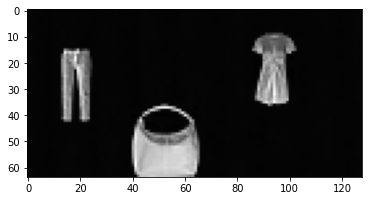

In [5]:
# Read a pickle file and disply its samples
# Note that image data are stored as unit8 so each element is an integer value between 0 and 255
data = pickle.load( open( './data/Test.pkl', 'rb' ), encoding='bytes')
targets = np.genfromtxt('./data/TrainLabels.csv', delimiter=',')
plt.imshow(data[9999,:,:],cmap='gray', vmin=0, vmax=256)
data.shape

In [0]:
from sklearn import cluster

kmeans_cluster = cluster.KMeans(n_clusters=3, init='k-means++')
newdatalist = []
for index in range(data.shape[0]):
  arr1 = np.argwhere(data[index,:,:] > 20) #2d array where each row has x and y coordinates of non black values
  kmeans_cluster.fit(arr1)
  cluster_centers = kmeans_cluster.cluster_centers_
  newimagelist = []
  for i in range(len(cluster_centers)): 
    row = int(round(cluster_centers[i][0]))
    col = int(round(cluster_centers[i][1]))
    if row<=13:
      row = 14
    if row >= 50:
      row = 49
    if col<=13:
      col = 14
    if col >= 114:
      col = 113
    newimagelist.append(data[index,row-14:row+14,col-14:col+14])
  newimage = np.concatenate(newimagelist,axis=1)
  newdatalist.append(newimage)



In [0]:
# plt.imshow(data[55093] ,cmap='gray', vmin=0, vmax=256)
newdata = np.stack(newdatalist)
newdata.dump("./data/NewTest.pkl")

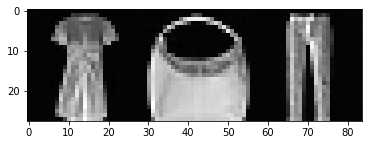

In [0]:
plt.imshow(newdata[9999] ,cmap='gray', vmin=0, vmax=256)


In [0]:
import cv2
print(cv2.__version__)


4.1.2


In [0]:
!pip install opencv-contrib-python

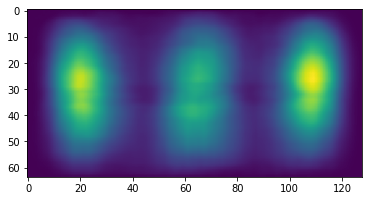

In [23]:
train_data = pickle.load(open('./data/Train.pkl', 'rb'), encoding='bytes')

sums = train_data.sum(axis=0)
# sums /= train_data.shape[0]

plt.imshow(sums)
plt.savefig("heatmap.png")